In [1]:
import platform
print(platform.python_version())
from ROOT import TFile,vector
import ROOT
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
import math


import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats
from scipy.interpolate import interp1d
from scipy.integrate import quad
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from textwrap import wrap
import copy

import seaborn as sns
import SupportingFunctions as SF

3.5.2
Welcome to JupyROOT 6.14/08


In [4]:
NUMU_R1_POT = 4.71579e+20
NUMU_R1_1MIL_POT = 1.33678E+21
NUE_R1_POT  = 9.80259e+22

DETVAR_CV_POT =  9.65858292241e+19

NUMU_R3_POT = 8.98773223801e+20
NUE_R3_POT = 4.707047e+22

NUMU_R2_POT = 4.08963968669e+20
NUE_R2_POT = 9.2085012316e+22

CCPI0_R1_POT = 6.95344e+20
CCPI0_R3_POT = 5.92213e+20
NCPI0_R1_POT = 2.90401e+21
NCPI0_R3a_POT = 2.62745e+20
NCPI0_R3b_POT = 2.22482e+21

DATA_R1_OPEN_POT = 4.403e+19
DATA_R3_OPEN_POT = 8.786e+18
DATA_R1_PI0FILTER_POT =1.746e+20
DATA_R2D_PI0FILTER_POT = 2.050e+20
DATA_R2E_PI0FILTER_POT = 6.507e+19
DATA_R3F_PI0FILTER_POT = 4.3e+19
DATA_R3G_PI0FILTER_POT = 2e+20

FAKE_DATA_1_RUN1_POT = 1.925e20
FAKE_DATA_1_RUN3_POT = 2.83e20

EXT_R1_PI0FILTER_POT = 22474918.0/41898673.0 * DATA_R1_PI0FILTER_POT 
EXT_R1_OPEN_POT = 22474918.0 / 9776965.0* DATA_R1_OPEN_POT

EXT_R2D_PI0FILTER_POT =  39566274.0/49422124.0 * DATA_R2D_PI0FILTER_POT
EXT_R2E_PI0FILTER_POT =  39566274.0/19914275.0 * DATA_R2E_PI0FILTER_POT
EXT_R3F_PI0FILTER_POT =  39566274.0/11229268.0 * DATA_R3F_PI0FILTER_POT
EXT_R3G_PI0FILTER_POT =  39566274.0/51705212.0 * DATA_R3G_PI0FILTER_POT
EXT_R3_OPEN_POT = 39566274.0/2263559.0 * DATA_R3_OPEN_POT

POT_SCALE_FACTOR = 1.0 #if I feel like playing with scaling
# CURRENT TOTAL
DATA_POT_TOTAL = DATA_R1_PI0FILTER_POT+DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT+DATA_R3F_PI0FILTER_POT+DATA_R3G_PI0FILTER_POT
# DATA_POT_TOTAL = DATA_R3F_PI0FILTER_POT+DATA_R3G_PI0FILTER_POT

print("total POT: ",DATA_POT_TOTAL)

NUMU_R1_OPEN_SCALE = (POT_SCALE_FACTOR*DATA_R1_OPEN_POT)/ float(NUMU_R1_POT)
NUE_R1_OPEN_SCALE =  (POT_SCALE_FACTOR*DATA_R1_OPEN_POT)/ float(NUE_R1_POT)
EXT_R1_OPEN_SCALE =  (POT_SCALE_FACTOR*DATA_R1_OPEN_POT)/ float(EXT_R1_OPEN_POT)
CCPI0_R1_OPEN_SCALE = (POT_SCALE_FACTOR*DATA_R1_OPEN_POT)/ float(CCPI0_R1_POT)
NCPI0_R1_OPEN_SCALE = (POT_SCALE_FACTOR*DATA_R1_OPEN_POT)/ float(NCPI0_R1_POT)


NUMU_R1_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R1_PI0FILTER_POT)/ float(NUMU_R1_POT)
NUMU_R1_1MIL_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R1_PI0FILTER_POT)/ float(NUMU_R1_1MIL_POT)
NUE_R1_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R1_PI0FILTER_POT)/ float(NUE_R1_POT)
EXT_R1_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R1_PI0FILTER_POT)/ float(EXT_R1_PI0FILTER_POT)
CCPI0_R1_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R1_PI0FILTER_POT)/ float(CCPI0_R1_POT)
NCPI0_R1_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R1_PI0FILTER_POT)/ float(NCPI0_R1_POT)


NUMU_R2D_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R2D_PI0FILTER_POT)/ float(NUMU_R2_POT)
NUE_R2D_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R2D_PI0FILTER_POT)/ float(NUE_R2_POT)
EXT_R2D_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R2D_PI0FILTER_POT)/ float(EXT_R2D_PI0FILTER_POT)
NUMU_R2E_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R2E_PI0FILTER_POT)/ float(NUMU_R2_POT)
NUE_R2E_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R2E_PI0FILTER_POT)/ float(NUE_R2_POT)
EXT_R2E_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R2E_PI0FILTER_POT)/ float(EXT_R2E_PI0FILTER_POT)

NUMU_R3_OPEN_SCALE = (POT_SCALE_FACTOR*DATA_R3_OPEN_POT)/ float(NUMU_R3_POT)
NUE_R3_OPEN_SCALE =  (POT_SCALE_FACTOR*DATA_R3_OPEN_POT)/ float(NUE_R3_POT)
EXT_R3_OPEN_SCALE =  (POT_SCALE_FACTOR*DATA_R3_OPEN_POT)/ float(EXT_R3_OPEN_POT)
NUMU_R3F_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R3F_PI0FILTER_POT)/ float(NUMU_R3_POT)
NUE_R3F_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R3F_PI0FILTER_POT)/ float(NUE_R3_POT)
EXT_R3F_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R3F_PI0FILTER_POT)/ float(EXT_R3F_PI0FILTER_POT)
NUMU_R3G_PI0FILTER_SCALE = (POT_SCALE_FACTOR*DATA_R3G_PI0FILTER_POT)/ float(NUMU_R3_POT)
NUE_R3G_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R3G_PI0FILTER_POT)/ float(NUE_R3_POT)
EXT_R3G_PI0FILTER_SCALE =  (POT_SCALE_FACTOR*DATA_R3G_PI0FILTER_POT)/ float(EXT_R3G_PI0FILTER_POT)

CCPI0_R3F_PI0FILTER_SCALE = (POT_SCALE_FACTOR*(DATA_R3F_PI0FILTER_POT))/ float(CCPI0_R3_POT)
NCPI0_R3F_PI0FILTER_SCALE = (POT_SCALE_FACTOR*(DATA_R3F_PI0FILTER_POT))/ float(NCPI0_R3a_POT+NCPI0_R3b_POT)
CCPI0_R3G_PI0FILTER_SCALE = (POT_SCALE_FACTOR*(DATA_R3G_PI0FILTER_POT))/ float(CCPI0_R3_POT)
NCPI0_R3G_PI0FILTER_SCALE = (POT_SCALE_FACTOR*(DATA_R3G_PI0FILTER_POT))/ float(NCPI0_R3a_POT+NCPI0_R3b_POT)


NUMU_R3_DETVAR_SCALE = (DETVAR_CV_POT)/ float(NUMU_R3_POT)

total POT:  6.8767e+20


In [6]:
# Or, we can load from pickles if you, you know, want to.
# Pickle read for easy access later, eh?

tag = 'Nov_20_run1_numu'
df_numu_goodruns_pmtprecut = pd.read_pickle('../data/pickles/numu_goodruns_precuts_%s.pickle'%tag)
tag = 'Feb_4_run1_numu'
df_numu_1mil_goodruns_pmtprecut = pd.read_pickle('../data/pickles/numu_goodruns_precuts_%s.pickle'%tag)
tag = 'Feb_5_run1_numu_dlana'
df_numu_1mil_goodruns_pmtprecut_ana = pd.read_pickle('../data/pickles/numu_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_run1_nue'
df_nue_goodruns_pmtprecut = pd.read_pickle('../data/pickles/nue_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_run1_ext'
df_ext_goodruns_pmtprecut = pd.read_pickle('../data/pickles/ext_goodruns_precuts_%s.pickle'%tag)
tag ='Nov_20_open_run1'
df_data_goodruns_pmtprecut = pd.read_pickle('../data/pickles/data_goodruns_precuts_%s.pickle'%tag)

tag = 'Nov_20_run2_numu'
df_numu_r2_goodruns_pmtprecut = pd.read_pickle('../data/pickles/numu_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_run2_nue'
df_nue_r2_goodruns_pmtprecut = pd.read_pickle('../data/pickles/nue_goodruns_precuts_%s.pickle'%tag)

tag = 'Nov_20_run3_numu'
df_numu_r3_goodruns_pmtprecut = pd.read_pickle('../data/pickles/numu_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_run3_nue'
df_nue_r3_goodruns_pmtprecut = pd.read_pickle('../data/pickles/nue_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_run3_ext'
df_ext_r3_goodruns_pmtprecut = pd.read_pickle('../data/pickles/ext_goodruns_precuts_%s.pickle'%tag)

tag = 'Jan_15_run1_CCPi0'
df_ccpi0_r1_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
print("all events: ", len(df_ccpi0_r1_goodruns_pmtprecut))
print(" haspi0 events: ", len(df_ccpi0_r1_goodruns_pmtprecut.query("haspi0==1")))
tag = 'Jan_15_run3_CCPi0'
df_ccpi0_r3_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run1_NCPi0'
df_ncpi0_r1_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run3a_NCPi0'
df_ncpi0_r3a_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
tag = 'Jan_15_run3b_NCPi0'
df_ncpi0_r3b_goodruns_pmtprecut = pd.read_pickle('../data/pickles/%s.pickle'%tag)
# combine r3a,r3b files
df_ncpi0_r3_goodruns_pmtprecut = df_ncpi0_r3a_goodruns_pmtprecut.append(df_ncpi0_r3b_goodruns_pmtprecut)

ccpi0r1pi0=np.ones(len(df_ccpi0_r1_goodruns_pmtprecut))
df_ccpi0_r1_goodruns_pmtprecut["newhaspi0"] = ccpi0r1pi0
ccpi0r3pi0=np.ones(len(df_ccpi0_r3_goodruns_pmtprecut))
df_ccpi0_r3_goodruns_pmtprecut["newhaspi0"] = ccpi0r3pi0

ncpi0r1pi0=np.ones(len(df_ncpi0_r1_goodruns_pmtprecut))
df_ncpi0_r1_goodruns_pmtprecut["newhaspi0"] = ncpi0r1pi0
ncpi0r3pi0=np.ones(len(df_ncpi0_r3_goodruns_pmtprecut))
df_ncpi0_r3_goodruns_pmtprecut["newhaspi0"] = ncpi0r3pi0

tag = 'Nov_20_pi0box_run1'
df_data_r1_pi0filter_pmtprecut = pd.read_pickle('../data/pickles/data_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_pi0box_run2D'
df_data_r2D_pi0filter_pmtprecut = pd.read_pickle('../data/pickles/data_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_pi0box_run2E'
df_data_r2E_pi0filter_pmtprecut = pd.read_pickle('../data/pickles/data_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_pi0box_run3F'
df_data_r3F_pi0filter_pmtprecut = pd.read_pickle('../data/pickles/data_goodruns_precuts_%s.pickle'%tag)
tag = 'Nov_20_pi0box_run3G'
df_data_r3G_pi0filter_pmtprecut = pd.read_pickle('../data/pickles/data_goodruns_precuts_%s.pickle'%tag)

all events:  3307
 haspi0 events:  3307


In [7]:
# start with classic pi0 cuts on each df
# cut on new shower variables separately
cuts_new = 'good ==1 and PassPMTPrecut ==1 and PassShowerReco ==1 and InFiducial ==1 and _pi0mass_new<400 and DeltaMass_new >0 and DeltaMass_new <1400 and NTracks ==2 and Proton_Edep>60.0  and Electron_Edep>35.0  and shower1_E_Y_new>80 and ChargeNearTrunk >250 and Electron_ThetaRecoB_e1ep <1.5 and _shower_alpha <2.5 and _pi0mass_new>0 and BDTscore_1e1p<.7'
# cuts_new=precuts
cuts_2 = 'PassPMTPrecut ==1 and PassShowerReco ==1 and InFiducial ==1 and _pi0mass_new<400 and DeltaMass_new >0 and DeltaMass_new <1400 and NTracks ==2 and Proton_Edep>60.0  and Electron_Edep>35.0  and shower1_E_Y_new>80 and ChargeNearTrunk >250 and Electron_ThetaRecoB_e1ep <1.5 and _shower_alpha <2.5 and _pi0mass_new>0 and BDTscore_1e1p<.7'

RSE = ['run','subrun','event']
sort = 'shower1_E_Y'

# now apply cuts
# also cut overlapping events between samples
df_numu_pi0 = df_numu_goodruns_pmtprecut.query(cuts_new+ 'and newhaspi0==0 and not (nu_interaction_ccnc==0 and abs(nu_pdg)==12)')
df_numu_pi0 = df_numu_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_numu_1mil_pi0 = df_numu_1mil_goodruns_pmtprecut.query(cuts_new+ 'and newhaspi0==0 and not (nu_interaction_ccnc==0 and abs(nu_pdg)==12)')
df_numu_1mil_pi0 = df_numu_1mil_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()

df_nue_pi0 = df_nue_goodruns_pmtprecut.query(cuts_new + ' and not (nu_interaction_ccnc==0 and abs(nu_pdg)==14)')
df_nue_pi0 = df_nue_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ext_pi0 = df_ext_goodruns_pmtprecut.query(cuts_new)
df_ext_pi0 = df_ext_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_data_r1_open_pi0 = df_data_goodruns_pmtprecut.query(cuts_new)
df_data_r1_open_pi0 = df_data_r1_open_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
print(len(df_data_r1_open_pi0)/len(df_numu_pi0))

df_numu_r2_pi0 = df_numu_r2_goodruns_pmtprecut.query(cuts_new + 'and not (nu_interaction_ccnc==0 and abs(nu_pdg)==12)')
df_numu_r2_pi0 = df_numu_r2_pi0.sort_values(sort,ascending=False).drop_duplicates('CVIndex').sort_index()
df_nue_r2_pi0 = df_nue_r2_goodruns_pmtprecut.query(cuts_new)
df_nue_r2_pi0 = df_nue_r2_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
print(len(df_nue_r2_pi0))

df_numu_r3_pi0 = df_numu_r3_goodruns_pmtprecut.query(cuts_new+ 'and not (nu_interaction_ccnc==0 and abs(nu_pdg)==12)')
df_numu_r3_pi0 = df_numu_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_nue_r3_pi0 = df_nue_r3_goodruns_pmtprecut.query(cuts_new+ 'and not (nu_interaction_ccnc==0 and abs(nu_pdg)==14)')
df_nue_r3_pi0 = df_nue_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ext_r3_pi0 = df_ext_r3_goodruns_pmtprecut.query(cuts_new)
df_ext_r3_pi0 = df_ext_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()

df_data_r1_pi0filter_pi0 = df_data_r1_pi0filter_pmtprecut.query(cuts_new)
df_data_r1_pi0filter_pi0 = df_data_r1_pi0filter_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_data_r2D_pi0filter_pi0 = df_data_r2D_pi0filter_pmtprecut.query(cuts_new)
df_data_r2D_pi0filter_pi0 = df_data_r2D_pi0filter_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_data_r2E_pi0filter_pi0 = df_data_r2E_pi0filter_pmtprecut.query(cuts_new)
df_data_r2E_pi0filter_pi0 = df_data_r2E_pi0filter_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_data_r3F_pi0filter_pi0 = df_data_r3F_pi0filter_pmtprecut.query(cuts_new)
df_data_r3F_pi0filter_pi0 = df_data_r3F_pi0filter_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_data_r3G_pi0filter_pi0 = df_data_r3G_pi0filter_pmtprecut.query(cuts_new)
df_data_r3G_pi0filter_pi0 = df_data_r3G_pi0filter_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()

df_data_r2_pi0filter_pi0 = df_data_r2D_pi0filter_pi0.append(df_data_r2E_pi0filter_pi0)
df_data_r3_pi0filter_pi0 = df_data_r3F_pi0filter_pi0.append(df_data_r3G_pi0filter_pi0)

# mc pi0 samples
df_ccpi0_r1_pi0 = df_ccpi0_r1_goodruns_pmtprecut.query(cuts_new)
df_ccpi0_r1_pi0 = df_ccpi0_r1_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ccpi0_r3_pi0 = df_ccpi0_r3_goodruns_pmtprecut.query(cuts_2)
df_ccpi0_r3_pi0 = df_ccpi0_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ncpi0_r1_pi0 = df_ncpi0_r1_goodruns_pmtprecut.query(cuts_2)
df_ncpi0_r1_pi0 = df_ncpi0_r1_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
df_ncpi0_r3_pi0 = df_ncpi0_r3_goodruns_pmtprecut.query(cuts_2)
df_ncpi0_r3_pi0 = df_ncpi0_r3_pi0.sort_values(sort,ascending=False).drop_duplicates(RSE).sort_index()
print("pi0 lengths: ", len(df_ccpi0_r1_pi0), len(df_ccpi0_r3_pi0), len(df_ncpi0_r1_pi0), len(df_ncpi0_r3_pi0))

0.39779005524861877
2532
pi0 lengths:  1121 1011 1134 1174


In [8]:
# add all of the data frames
# df_data_total = df_fakedata1_run1_pi0.append(df_fakedata1_run3_pi0)
df_data_total_1 = df_data_r1_pi0filter_pi0.append(df_data_r2D_pi0filter_pi0)
df_data_total_2 = df_data_total_1.append(df_data_r2E_pi0filter_pi0)
df_data_total_3 = df_data_total_2.append(df_data_r3F_pi0filter_pi0)
df_data_total = df_data_total_3.append(df_data_r3G_pi0filter_pi0)

print("total number of data pi0: ",len(df_data_total['_pi0mass'].values))
# scale CV weights:
def potscale(df,scalefactor=1.0,ext=False):
    pot_weight = []
    for i in range(len(df)):
        if ext==False:
            pot_weight.append(scalefactor)
        else:
            pot_weight.append(scalefactor)
    return pot_weight

# general mc
w_mu_1 =potscale(df_numu_pi0,DATA_R1_PI0FILTER_POT/NUMU_R1_POT)
w_mu_1_1mil =potscale(df_numu_1mil_pi0,DATA_R1_PI0FILTER_POT/NUMU_R1_1MIL_POT)
w_mu_2 =potscale(df_numu_r2_pi0,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/NUMU_R2_POT)
w_mu_3 =potscale(df_numu_r3_pi0,(DATA_R3F_PI0FILTER_POT+DATA_R3G_PI0FILTER_POT)/NUMU_R3_POT)
df_numu_pi0['pot_weight'] = w_mu_1
df_numu_1mil_pi0['pot_weight'] = w_mu_1_1mil
df_numu_r2_pi0['pot_weight'] = w_mu_2
df_numu_r3_pi0['pot_weight'] = w_mu_3

# df_numu_total_1 = df_numu_pi0.append(df_numu_r2_pi0)
df_numu_total_1 = df_numu_1mil_pi0.append(df_numu_r2_pi0)
df_numu_total = df_numu_total_1.append(df_numu_r3_pi0)

w_e_1 =potscale(df_nue_pi0,DATA_R1_PI0FILTER_POT/NUE_R1_POT)
w_e_2 =potscale(df_nue_r2_pi0,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/NUE_R2_POT)
w_e_3 =potscale(df_nue_r3_pi0,(DATA_R3F_PI0FILTER_POT+DATA_R3G_PI0FILTER_POT)/NUE_R3_POT)
df_nue_pi0['pot_weight'] = w_e_1
df_nue_r2_pi0['pot_weight'] = w_e_2
df_nue_r3_pi0['pot_weight'] = w_e_3
df_nue_total_1 = df_nue_pi0.append(df_nue_r2_pi0)
df_nue_total = df_nue_total_1.append(df_nue_r3_pi0)

df_ext_r3_2_pi0 = df_ext_r3_pi0
df_ext_r3_3_pi0 = df_ext_r3_pi0
w_ext_1 =potscale(df_ext_pi0,DATA_R1_PI0FILTER_POT/EXT_R1_PI0FILTER_POT,True)
w_ext_2 =potscale(df_ext_r3_2_pi0,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/(EXT_R2D_PI0FILTER_POT+EXT_R2E_PI0FILTER_POT),True)
w_ext_3 =potscale(df_ext_r3_3_pi0,(DATA_R3F_PI0FILTER_POT+DATA_R3G_PI0FILTER_POT)/(EXT_R3F_PI0FILTER_POT+EXT_R3G_PI0FILTER_POT),True)
df_ext_pi0['pot_weight'] = w_ext_1
df_ext_r3_2_pi0['pot_weight'] = w_ext_2
df_ext_r3_2_pi0['pot_weight'] = w_ext_3
df_ext_total_1 = df_ext_pi0.append(df_ext_r3_2_pi0)
df_ext_total = df_ext_total_1.append(df_ext_r3_3_pi0)

# df_bnb_ncpi0_r2 = df_numu_r2_pi0.query('haspi0==1 and ccnc==1 and MC_scedr<5 and MC_parentPDG ==14')
# df_bnb_ccpi0_r2 = df_numu_r2_pi0.query("haspi0==1 and ccnc!=1 and MC_scedr<5 and MC_parentPDG ==14")

# df_bnb_offvtx_pi0_r2 = df_numu_r2_pi0.query("haspi0==1 and  MC_scedr>=5 and MC_parentPDG ==14")
# w_off_2 =potscale(df_bnb_offvtx_pi0_r2,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/NUMU_R2_POT)
# df_bnb_offvtx_pi0_r2['pot_weight'] = w_off_2

w_cc_1 =potscale(df_ccpi0_r1_pi0,DATA_R1_PI0FILTER_POT/CCPI0_R1_POT)
w_cc_3 =potscale(df_ccpi0_r3_pi0,(DATA_R3G_PI0FILTER_POT+DATA_R3F_PI0FILTER_POT)/(CCPI0_R3_POT))
w_cc_2 =potscale(df_ccpi0_r3_pi0,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/(CCPI0_R3_POT))
df_ccpi0_r1_pi0['pot_weight'] = w_cc_1
df_ccpi0_r3_pi0['pot_weight'] = w_cc_3
df_ccpi0_r2_pi0 = df_ccpi0_r3_pi0
df_ccpi0_r2_pi0['pot_weight'] = w_cc_2
df_ccpi0_total1 = df_ccpi0_r1_pi0.append(df_ccpi0_r2_pi0)
df_ccpi0_total = df_ccpi0_total1.append(df_ccpi0_r3_pi0)

w_nc_1 =potscale(df_ncpi0_r1_pi0,DATA_R1_PI0FILTER_POT/NCPI0_R1_POT)
w_nc_3 =potscale(df_ncpi0_r3_pi0,(DATA_R3G_PI0FILTER_POT+DATA_R3F_PI0FILTER_POT)/(NCPI0_R3a_POT+NCPI0_R3b_POT))
w_nc_2 =potscale(df_ncpi0_r3_pi0,(DATA_R2D_PI0FILTER_POT+DATA_R2E_PI0FILTER_POT)/(NCPI0_R3a_POT+NCPI0_R3b_POT))
df_ncpi0_r1_pi0['pot_weight'] = w_nc_1
df_ncpi0_r3_pi0['pot_weight'] = w_nc_3
df_ncpi0_r2_pi0 = df_ncpi0_r3_pi0
df_ncpi0_r2_pi0['pot_weight'] = w_nc_2
df_ncpi0_total1 = df_ncpi0_r1_pi0.append(df_ncpi0_r2_pi0)
df_ncpi0_total = df_ncpi0_total1.append(df_ncpi0_r3_pi0)

NUMU_POT_TOTAL = NUMU_R1_1MIL_POT+NUMU_R2_POT+NUMU_R3_POT
NUE_POT_TOTAL = NUE_R1_POT+NUE_R2_POT+NUE_R3_POT
EXT_POT_TOTAL = EXT_R1_PI0FILTER_POT+EXT_R2D_PI0FILTER_POT+EXT_R2E_PI0FILTER_POT+EXT_R3F_PI0FILTER_POT+EXT_R3G_PI0FILTER_POT
CCPI0_POT_TOTAL = CCPI0_R1_POT+CCPI0_R3_POT
NCPI0_POT_TOTAL = NCPI0_R1_POT+NCPI0_R3a_POT+NCPI0_R3b_POT

DATA_POT_TOTAL = DATA_R1_PI0FILTER_POT+ DATA_R2D_PI0FILTER_POT+ DATA_R2E_PI0FILTER_POT+ DATA_R3F_PI0FILTER_POT+ DATA_R3G_PI0FILTER_POT
DATA_R2_POT_TOTAL = DATA_R2D_PI0FILTER_POT+ DATA_R2E_PI0FILTER_POT
print("pot total:",DATA_POT_TOTAL)
POT_SCALE_FACTOR = DATA_POT_TOTAL
NUMU_SCALE_TOTAL = POT_SCALE_FACTOR / float(NUMU_POT_TOTAL)
NUE_SCALE_TOTAL = POT_SCALE_FACTOR / float(NUE_POT_TOTAL)
CCPI0_SCALE_TOTAL =POT_SCALE_FACTOR / float(CCPI0_POT_TOTAL)
NCPI0_SCALE_TOTAL = POT_SCALE_FACTOR / float(NCPI0_POT_TOTAL)
EXT_SCALE_TOTAL = POT_SCALE_FACTOR / float(EXT_POT_TOTAL)
DATA_SCALE_TOTAL = POT_SCALE_FACTOR / float(DATA_POT_TOTAL)

total number of data pi0:  2016


/home/kmason/.local/lib/python3.5/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


pot total: 6.8767e+20
0.5340889762550319


In [24]:
# Define Calibration Functions

def calibmass(df,slope,bias = 0):
    #function to load in current values and recalculate invariant mass 
    #with a new slope and bias. Returns a list of all new values.
   
    currentslope = 0.01319672
    currentbias = 0
    var_new = []
    for idx in range(len(df)):
        currentE1= df['shower1_E_Y_new'].values[idx]
        currentE2= df['shower2_E_Y_new'].values[idx]
        newE1 = (slope*(currentE1-currentbias)/currentslope)+bias
        newE2 = (slope*(currentE2-currentbias)/currentslope)+bias
        alpha = df['_shower_alpha'].values[idx]
        if(newE1 <= 0 or newE2 <=0):
            newmass = 0        
        else:
            newmass = sqrt(4*newE1*newE2*sin(alpha/2)*sin(alpha/2))
        var_new.append(newmass)
    return var_new


def findSlopeandBias(df,m,weight=False):
    #Function to get the total chi2 using a specific m,b 
    currentslope = 0.013456
    currentbias = 2.06955
    chi2_total = 0
    
    for idx in range(len(df)):
        E1 = df['shower1_E_Y'].values[idx]
        E2= df['shower2_E_Y'].values[idx]
        A1 = (E1-currentbias)/currentslope
        A2 = (E2-currentbias)/currentslope
        alpha = df["_shower_alpha"].values[idx]
        C = 4*sin(alpha/2.0)*sin(alpha/2.0)
        if((m*A1)>= 0 and (m*A2)>= 0):
            newmass = (C*(m*A1)*(m*A2))
        else:
            newmass = -300
        dM= 29.8

        chisq = ((135-sqrt(newmass))**2)/(dM**2)
        if weight==True:
            chisq=chisq*df['pi0_weight'].values[idx]

#         print("C:","%.2f" % C,"A1:","%.2f" % A1,"A2:","%.2f" % A2,"newmass:","%.2f" % newmass,"sqrt(newmass):","%.2f" % sqrt(newmass),"numerator","%.2f" % (135**2-newmass)**2,"dm:","%.2f" % dM,"chisq:","%.2f" % chisq)
        chi2_total+=chisq
    
#     chi2_total = chi2_total/(1.0*(len(df)-1))
    return chi2_total

# Try values of m and b for various data sets
1) plot the chi2 total for each m,b combination.
draw on line from michel constraint.

2) make 1dhist of chi2 for m,b in michel constraint.

3) compare the two best fit values

Doing this for: A) "good MC"  B) All MC C)All data

In [25]:
# function to add in pi0 weights
def getweights(df):
    a_CC= 2.75e-06
    b_CC= -0.0032
    c_CC = 1.553

    a_NC= 2.54e-06
    b_NC= -0.0039
    c_NC = 1.494

    weights =[]
    mom = df['pi0_momentum_true'].values
    pi0s = df['_pi0mass'].values
    ccnc = df['ccnc'].values

    for i in range(len(mom)):
        if pi0s[i] > 0 and a_CC*(mom[i]**2)+b_CC*mom[i]+c_CC <4:
            if ccnc[i]==0:
                weights.append(a_CC*(mom[i]**2)+b_CC*mom[i]+c_CC)
            else:
                if(a_NC*(mom[i]**2)+b_NC*mom[i]+c_NC <0):
                    weights.append(.001)
                else:
                    weights.append(a_NC*(mom[i]**2)+b_NC*mom[i]+c_NC)
        else:
            weights.append(1.0)
    return weights

In [26]:
# Setting some constants
nbins =20 #bins in mass histograms
myrange = [35,350] #pi0 plotting range

# combine into one MC sample
df_MC_all_1 = df_numu_total.append(df_ncpi0_r1_pi0)
df_MC_all_2 = df_MC_all_1.append(df_ncpi0_r3_pi0)
df_MC_all_3 = df_MC_all_2.append(df_ccpi0_r1_pi0)
df_MC_all = df_MC_all_1.append(df_ccpi0_r3_pi0)

# add in pi0 weights
pi0weights = getweights(df_MC_all)
df_MC_all['pi0_weight']=pi0weights

# cut out only good events (close to true vtx, has pi0, two showers start in fid)
truecuts = 'haspi0==1 and MC_scedr<5 and shower_energy_true >0 and secondshower_energy_true >0'
df_MC_goodpi0 = df_MC_all.query(truecuts)

def getADCAverage(df,data=False):
    A = []
    w = []
    currentslope = 0.013456
    currentbias = 2.06955

    for idx in range(len(df)):
        E1 = df['shower1_E_Y'].values[idx]
        E2= df['shower2_E_Y'].values[idx]
        A1 = (E1-currentbias)/currentslope
        A2 = (E2-currentbias)/currentslope
        if data==False:
            A.append(A1 * df['pi0_weight'].values[idx])
            w.append(df['pi0_weight'].values[idx])
            A.append(A2 * df['pi0_weight'].values[idx])
            w.append(df['pi0_weight'].values[idx])
        else:
            A.append(A1)
            w.append(1.0)
            A.append(A2)
            w.append(1.0)

    averageElow = (sum(A)/sum(w))
    print(averageElow)
    return

print("goodMC")
getADCAverage(df_MC_goodpi0)
print('AllMC')
getADCAverage(df_MC_all)
print('data')
getADCAverage(df_data_total,True)

goodMC
10464.590043963166
AllMC
10858.474016599139
data
10898.251677684859


MC CV Fitted Gaussian mean =  132.2272245232609
MC CV Fitted Guassian standard deviation   39.87056941081669
MC Good Pi0 Fitted Gaussian mean =  138.69321155410566
MC Good Pi0 Fitted Guassian standard deviation   29.86575160437375
data Fitted Gaussian mean =  137.47093182580423
data Fitted Guassian standard deviation   48.897044221783474


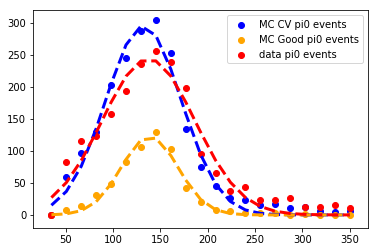

In [27]:
# Pause and do a gaussian fit to the distributions
var_mcpi0_numu = df_MC_all['_pi0mass_new'].values
weightsmc =[ df_MC_all['pi0_weight'].values[i]*df_MC_all['pot_weight'].values[i]*df_MC_all['xsec_corr_weight'].values[i] for i  in range(len(var_mcpi0_numu))]
var_mcpi0_good = df_MC_goodpi0['_pi0mass_new'].values
weightsgood =[ df_MC_goodpi0['pi0_weight'].values[i]*df_MC_goodpi0['pot_weight'].values[i]*df_MC_goodpi0['xsec_corr_weight'].values[i] for i  in range(len(var_mcpi0_good))]
var_datapi0_numu = df_data_total['_pi0mass'].values

# set up histograms
mc_y,mc_x = np.histogram(var_mcpi0_numu,bins = 20, range = myrange, weights=weightsmc)
mc_y = list(mc_y)
mc_y =ar([0]+mc_y)
good_y,good_x = np.histogram(var_mcpi0_good,bins = 20, range = myrange, weights=weightsgood)
good_y = list(good_y)
good_y =ar([0]+good_y)
data_y,data_x = np.histogram(var_datapi0_numu,bins = 20, range = myrange)
data_y = list(data_y)
data_y =ar([0]+data_y)


#general fit format, any function. You could use 'gaus' as above, or some other function f you can define
#popt,pcov = curve_fit(FUNCTION,x,y,p0 = [the fittable parameters defined in your function. these are just seeds]
#this will work fine unless your seeds are wildly far from the best answer
mc_mean = sum(mc_x*mc_y)/sum(mc_y)
mc_sigma = np.sqrt(sum(mc_y * (mc_x - mc_mean)**2) / sum(mc_y))
mc_p0 = [0, mc_mean,mc_sigma]
mc_popt,mc_pcov = curve_fit(SF.gaus,mc_x,mc_y,p0=mc_p0,maxfev = 100000000)
good_mean = sum(good_x*good_y)/sum(good_y)
good_sigma = np.sqrt(sum(good_y * (good_x - good_mean)**2) / sum(good_y))
good_p0 = [0, good_mean,good_sigma]
good_popt,good_pcov = curve_fit(SF.gaus,good_x,good_y,p0=good_p0,maxfev = 100000000)
#popt is the fitted parameter array, pcov is the covariance array
data_mean = sum(data_x*data_y)/sum(data_y)
data_sigma = np.sqrt(sum(data_y * (data_x - data_mean)**2) / sum(data_y))
data_p0 = [0, data_mean,data_sigma]
data_popt,data_pcov = curve_fit(SF.gaus,data_x,data_y,p0=data_p0,maxfev = 100000000)


print ('MC CV Fitted Gaussian mean = ', mc_popt[1])
print ('MC CV Fitted Guassian standard deviation  ', mc_popt[2])
plt.scatter(mc_x,mc_y,color='blue',marker='o',label='MC CV pi0 events')
plt.plot(mc_x,SF.gaus(mc_x,*mc_popt),ls='--',lw=3,color='blue')
print ('MC Good Pi0 Fitted Gaussian mean = ', good_popt[1])
print ('MC Good Pi0 Fitted Guassian standard deviation  ', good_popt[2])
plt.scatter(good_x,good_y,color='orange',marker='o',label='MC Good pi0 events')
plt.plot(good_x,SF.gaus(good_x,*good_popt),ls='--',lw=3,color='orange')
print ('data Fitted Gaussian mean = ', data_popt[1])
print ('data Fitted Guassian standard deviation  ', data_popt[2])
plt.scatter(data_x,data_y,color='red',marker='o',label='data pi0 events')
plt.plot(data_x,SF.gaus(data_x,*data_popt),ls='--',lw=3,color='red')

plt.legend(loc='upper right')
plt.show()



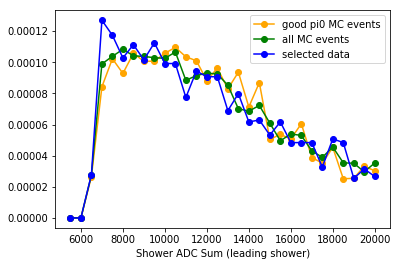

In [29]:
# plot of ADC distributions
adc_good_mc = df_MC_goodpi0['shower1_sumQ_Y'].values
adc_good_mc_weights = df_MC_goodpi0['pi0_weight'].values

adc_all_mc = df_MC_all['shower1_sumQ_Y'].values
adc_all_mc_weights = df_MC_all['pi0_weight'].values

adc_data = df_data_total['shower1_sumQ_Y'].values

good_Hist,binedges = np.histogram( adc_good_mc, bins = 30, range = [5000,20000],weights = adc_good_mc_weights, density =True)
bincenters = np.ones(len(binedges)-1)
for i in range(len(binedges)-1):
    bincenters[i] = binedges[i]+(15000.0/30.0)
    
all_Hist,binedges = np.histogram( adc_all_mc, bins = 30, range = [5000,20000],weights = adc_all_mc_weights,density =True)
data_Hist,binedges = np.histogram( adc_data, bins = 30, range = [5000,20000],density =True)

plt.plot(bincenters,good_Hist,color = 'orange', marker = 'o', label = 'good pi0 MC events')
plt.plot(bincenters,all_Hist,color = 'green', marker = 'o', label = 'all MC events')
plt.plot(bincenters,data_Hist,color = 'blue', marker = 'o', label = 'selected data')

plt.xlabel("Shower ADC Sum (leading shower)")
plt.legend()
plt.show()
plt.close()

best fit slope:  0.011999 chi2:  2815.713778196996 /ndof:  2213 =  1.2723514587424292
range[ 0.011935999999999999 , 0.012053 ]


(0, 5.0)

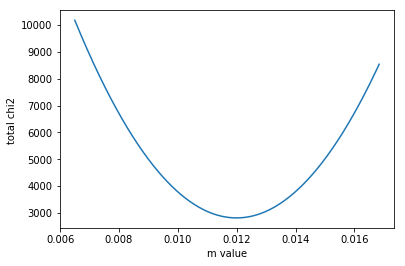

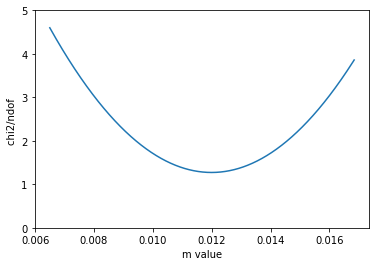

In [44]:
# first do good MC events
slopes_2D = [i*0.000009+.0065 for i in range(1150)]
# shift = -0.000267

minval_good = 10000000000
minslope_low_good = -999999
minslope_high_good = -999999

square_vals = [0.0 for i in range(1150)]

for i in range(len(slopes_2D)):

    chi2 = findSlopeandBias(df_MC_goodpi0,slopes_2D[i],weight=True)
    square_vals[i]=chi2

    if(chi2<minval_good):
        minval_good = chi2
        minslope_good = slopes_2D[i]

print("best fit slope: ", minslope_good ,"chi2: ",minval_good,"/ndof: ",len(df_MC_goodpi0),"= ",minval_good/float(len(df_MC_goodpi0)))

fig, ax = plt.subplots()
plt.plot(slopes_2D,square_vals)

minallowed_val_good = 1
maxallowed_val_good = -1

for i in range(len(slopes_2D)):
    if (square_vals[i] - minval_good <1.0):
        if (slopes_2D[i]> maxallowed_val_good):
            maxallowed_val_good = slopes_2D[i]
        if (slopes_2D[i]< minallowed_val_good):
            minallowed_val_good = slopes_2D[i] 
print("range[",minallowed_val_good,",",maxallowed_val_good,"]")
    
ax.set_xlabel("m value")
ax.set_ylabel("total chi2 ")

fig1, ax1 = plt.subplots()
chi_ndof = []
for chi in square_vals:
    chi_ndof.append(chi/float(len(df_MC_goodpi0)))
plt.plot(slopes_2D,chi_ndof)
ax1.set_xlabel("m value")
ax1.set_ylabel("chi2/ndof ")
ax1.set_ylim(0,5.0)


best fit slope:  0.010981999999999999 chi2:  18551.884118826863 /ndof:  6958 =  2.6662667603947776
range[ 0.010955 , 0.011009 ]


(0, 5.0)

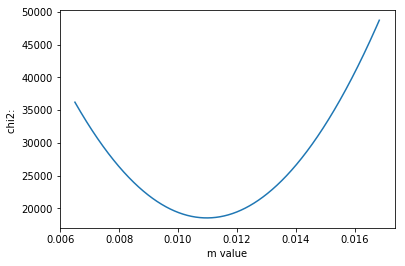

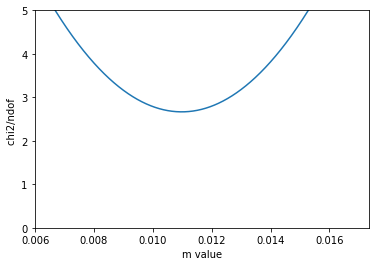

In [45]:
# next all MC
minval_all = 10000000000
minslope_low_all = -999999
minslope_high_all = -999999

square_vals = [0.0 for i in range(1150)]

for i in range(len(slopes_2D)):

    chi2 = findSlopeandBias(df_MC_all,slopes_2D[i],weight=True)
    square_vals[i]=chi2

    if(chi2<minval_all):
        minval_all = chi2
        minslope_all = slopes_2D[i]

print("best fit slope: ", minslope_all ,"chi2: ",minval_all,"/ndof: ",len(df_MC_all),"= ",minval_all/float(len(df_MC_all)))

fig, ax = plt.subplots()
plt.plot(slopes_2D,square_vals)

minallowed_val_all = 1
maxallowed_val_all = -1

for i in range(len(slopes_2D)):
    if (square_vals[i] - minval_all <1.0):
        if (slopes_2D[i]> maxallowed_val_all):
            maxallowed_val_all = slopes_2D[i]
        if (slopes_2D[i]< minallowed_val_all):
            minallowed_val_all = slopes_2D[i] 
print("range[",minallowed_val_all,",",maxallowed_val_all,"]")
    
ax.set_xlabel("m value")
ax.set_ylabel("chi2: ")

fig1, ax1 = plt.subplots()
chi_ndof = []
for chi in square_vals:
    chi_ndof.append(chi/float(len(df_MC_all)))
plt.plot(slopes_2D,chi_ndof)
ax1.set_xlabel("m value")
ax1.set_ylabel("chi2/ndof ")
ax1.set_ylim(0,5.0)



best fit slope:  0.010829 chi2:  7367.33913376115 /ndof:  2016 =  3.654434094127555
range[ 0.010775 , 0.010891999999999999 ]
shift the data
bestfit =  0.011846
min =  0.011755999999999999
max =  0.011935999999999999


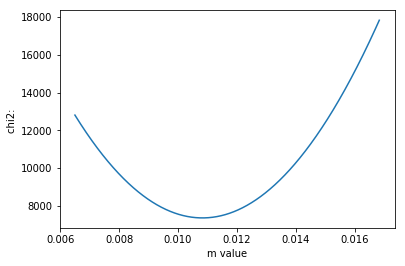

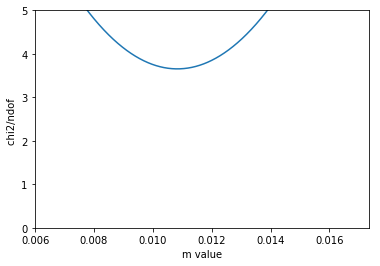

In [46]:
# finally data
minval_data = 10000000000
minslope_low_data = -999999
minslope_high_data = -999999

square_vals = [0.0 for i in range(1150)]

for i in range(len(slopes_2D)):

    chi2 = findSlopeandBias(df_data_total,slopes_2D[i])
    square_vals[i]=chi2

    if(chi2<minval_data):
        minval_data = chi2
        minslope_data = slopes_2D[i]

print("best fit slope: ", minslope_data ,"chi2: ",minval_data,"/ndof: ",len(df_data_total),"= ",minval_data/float(len(df_data_total)))

fig, ax = plt.subplots()
plt.plot(slopes_2D,square_vals)

minallowed_val_data = 1
maxallowed_val_data = -1

for i in range(len(slopes_2D)):
    if (square_vals[i] - minval_data <1.0):
        if (slopes_2D[i]> maxallowed_val_data):
            maxallowed_val_data = slopes_2D[i]
        if (slopes_2D[i]< minallowed_val_data):
            minallowed_val_data = slopes_2D[i] 
print("range[",minallowed_val_data,",",maxallowed_val_data,"]")
    
ax.set_xlabel("m value")
ax.set_ylabel("chi2: ")

fig1, ax1 = plt.subplots()
chi_ndof = []
for chi in square_vals:
    chi_ndof.append(chi/float(len(df_data_total)))
plt.plot(slopes_2D,chi_ndof)
ax1.set_xlabel("m value")
ax1.set_ylabel("chi2/ndof ")
ax1.set_ylim(0,5.0)

print("shift the data")
print("bestfit = ",minslope_data-(minslope_all-minslope_good) )
print("min = ",minallowed_val_data-(minallowed_val_all-minallowed_val_good) )
print("max = ",maxallowed_val_data-(maxallowed_val_all-maxallowed_val_good) )




# Detector variation samples

In [47]:
# load in all the run3 pickles
run = 'run3'
datafolder = '/media/disk1/kmason/detvars_highstats'
tag = '2021-02-10'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','LYAtt','LYRayleigh','SCE','wiremodThetaYZ','wiremodThetaXZ']

for name in names:
    s_detsyslist.append(name)

a_df_sys = []

RSE = ['run','subrun','event']
i=0
for sys in s_detsyslist:
    df_sys = pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(datafolder,sys,run,tag))
    i+=1
    a_df_sys.append(df_sys.query("isCV==False"))
    print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))


total 327918, cv = 315002 dv = 12916
total 327860, cv = 315002 dv = 12858
total 12348, cv = 5823 dv = 6525
total 325739, cv = 315002 dv = 10737
total 325976, cv = 315002 dv = 10974
total 327469, cv = 315002 dv = 12467
total 11684, cv = 5823 dv = 5861
total 327883, cv = 315002 dv = 12881
total 326568, cv = 315002 dv = 11566


In [48]:
# first cut all samples
cuts = 'PassSimpleCuts ==1 and Proton_Edep>60.0  and Electron_Edep>35.0 and PassPMTPrecut==1 and PassShowerReco==1  and shower1_E_Y>80 and ChargeNearTrunk >250 and Electron_ThetaRecoB_e1ep <1.5 and _shower_alpha <2.5 and _pi0mass_new>0 and _pi0mass_new < 200 and DeltaMass_new>0 and DeltaMass_new<1400 '
lengths = [] # list of lengths of each cut sample
names = [] # list of names of each sample
dfs = [] #list of dfs

df_run3_pi0_WiremodX = a_df_sys[0].query(cuts)
df_run3_pi0_WiremodYZ = a_df_sys[1].query(cuts)
df_run3_pi0_Recomb = a_df_sys[2].query(cuts)
df_run3_pi0_LYDown = a_df_sys[3].query(cuts)
df_run3_pi0_LYAtt = a_df_sys[4].query(cuts)
df_run3_pi0_LYRayleigh = a_df_sys[5].query(cuts)
df_run3_pi0_SCE = a_df_sys[6].query(cuts)
df_run3_pi0_WiremodThetaYZ = a_df_sys[7].query(cuts)
df_run3_pi0_WiremodThetaXZ = a_df_sys[8].query(cuts)


lengths.append(len(df_run3_pi0_LYDown))
names.append("LYDown")
dfs.append(df_run3_pi0_LYDown)
lengths.append(len(df_run3_pi0_LYAtt))
names.append("LYAtt")
dfs.append(df_run3_pi0_LYAtt)
lengths.append(len(df_run3_pi0_Recomb))
names.append("Recomb")
dfs.append(df_run3_pi0_Recomb)
lengths.append(len(df_run3_pi0_SCE))
names.append("SCE")
dfs.append(df_run3_pi0_SCE)
lengths.append(len(df_run3_pi0_WiremodThetaXZ))
names.append("ThetaXZ")
dfs.append(df_run3_pi0_WiremodThetaXZ)
lengths.append(len(df_run3_pi0_WiremodThetaYZ))
names.append("ThetaYZ")
dfs.append(df_run3_pi0_WiremodThetaYZ)
lengths.append(len(df_run3_pi0_WiremodYZ))
names.append("YZ")
dfs.append(df_run3_pi0_WiremodYZ)
lengths.append(len(df_run3_pi0_WiremodX))
names.append("X")
dfs.append(df_run3_pi0_WiremodX)
lengths.append(len(df_run3_pi0_LYRayleigh))
names.append("LYRayleigh")
dfs.append(df_run3_pi0_LYRayleigh)


print(lengths)
print(names)

[3426, 3456, 1968, 1862, 3713, 3833, 3937, 4051, 3848]
['LYDown', 'LYAtt', 'Recomb', 'SCE', 'ThetaXZ', 'ThetaYZ', 'YZ', 'X', 'LYRayleigh']


LYDown
LYAtt
Recomb
SCE
ThetaXZ
ThetaYZ
YZ
X
LYRayleigh
[0.014042, 0.014078, 0.013979, 0.014285, 0.014105, 0.01388, 0.014123, 0.014321, 0.01406]
[0.013961, 0.013996999999999999, 0.01388, 0.014176999999999999, 0.014023999999999998, 0.013798999999999999, 0.014041999999999999, 0.01424, 0.013978999999999998]
[0.011935999999999999, 0.011935999999999999, 0.011935999999999999, 0.011935999999999999, 0.011935999999999999, 0.011935999999999999, 0.011935999999999999, 0.011935999999999999, 0.011935999999999999]


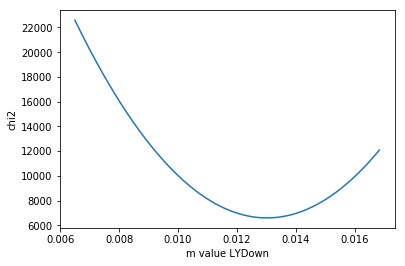

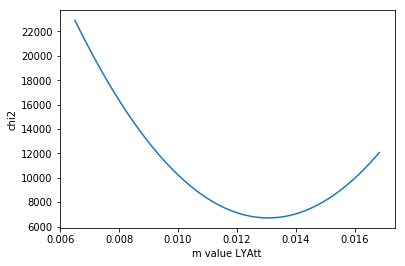

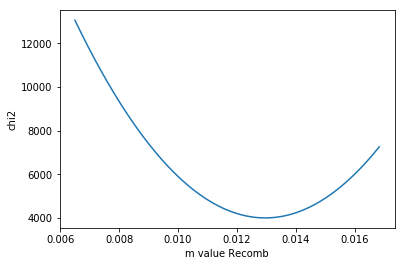

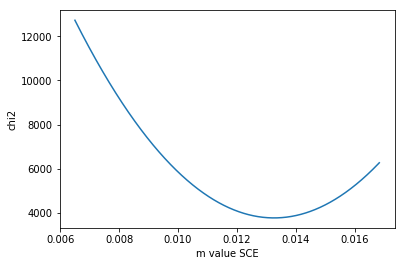

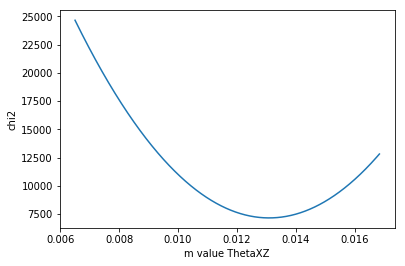

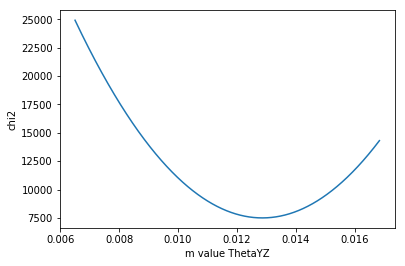

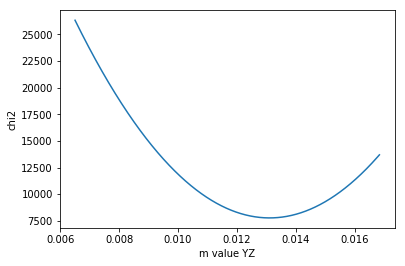

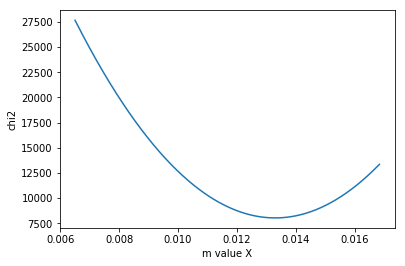

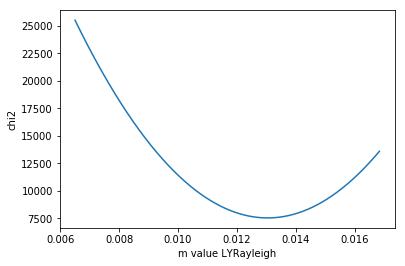

In [49]:
#  now calculate the minchi2 and range for each sample
shift = (minslope_all-minslope_good)
mins = []
min_low = []
min_high = []

for idx in range(len(dfs)):
    print(names[idx])
    square_vals = np.zeros(len(slopes_2D)) 
    minval = 10000000000
    minslope = -999999
    X = slopes_2D

    for i in range(len(slopes_2D)):
        chi2 = (findSlopeandBias(dfs[idx],slopes_2D[i],slopes_2D[i]))
        square_vals[i]=chi2

        if(chi2<minval):
            minval = chi2
            minslope = slopes_2D[i]
            
    minallowed_val = 1
    maxallowed_val = -1
    mins.append(minslope-shift)
    
    for i in range(len(slopes_2D)):
        if (square_vals[i] - minval <1.0):
            if (slopes_2D[i]> maxallowed_val):
                maxallowed_val = slopes_2D[i]
            if (slopes_2D[i]< minallowed_val):
                minallowed_val = slopes_2D[i] 

    min_low.append(minallowed_val-(minallowed_val_all-minallowed_val_good))
    min_high.append(maxallowed_val_data-(maxallowed_val_all-maxallowed_val_good))

    fig, ax = plt.subplots()
    plt.plot(slopes_2D,square_vals)

    ax.set_xlabel("m value " + names[idx])
    ax.set_ylabel("chi2" )
    
print(mins)
print(min_low)
print(min_high)

ValueError: operands could not be broadcast together with shapes (9,) (10,) 

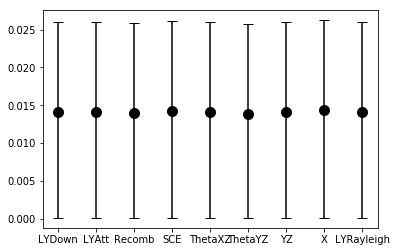

In [50]:
# put into a single plot
fig, ax = plt.subplots()
ax.errorbar(names,mins,fmt='o',yerr=[min_low ,min_high],color='black',capsize=5,markersize = 10)

y_value = [minslope_data-(minslope_all-minslope_good) for i in range(10)]
y_min = [minallowed_val_data-(minallowed_val_all-minallowed_val_good)  for i in range(10)]
y_max = [ maxallowed_val_data-(maxallowed_val_all-maxallowed_val_good) for i in range(10)]

plt.fill_between(names, y_min, y_max, alpha=.5,color = 'red')
plt.plot(names,y_value,color = "red")
ax.set_ylabel("m value" )
plt.xticks(rotation=90)



In [ ]:
# get error bar values
total = 0
for i in range(10):
    diff = mins[i] - minslope_data-(minslope_all-minslope_good) 
    total += diff**2

print("detector error: ", sqrt(total))

In [ ]:
# nick's version of plot
x_ticks=['LYDown','LYAtt','LYRayleigh','Rec2','SCE',
         'ThetaXZ','ThetaYZ','YZ','X']
x = [1,2,3,4,5,6,7,8,9]
x_ = [0] + x + [10]
ax.errorbar(x,mins,yerr=[min_low ,min_high],capsize=3,fmt='o')
ax.fill_between(x_,(maxallowed_val_data-(maxallowed_val_all-maxallowed_val_good))*np.ones_like(x_),
                (minallowed_val_data-(minallowed_val_all-minallowed_val_good))*np.ones_like(x_),alpha=.3,
                color='red',label='CV')
ax.plot(x_,sys_mid[0]*np.ones_like(x_),color='red')
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks, rotation='vertical', fontsize=12)
plt.legend()
plt.ylabel('Energy/charge confeversion factor')
plt.tight_layout()
plt.savefig('systematics.png')
plt.show()